In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
import sys; sys.path.append('..')
import random, math
import pyzx as zx
from fractions import Fraction
from pyzx.phasepoly import circuit_phase_polynomial_blocks, optimize_block
%config InlineBackend.figure_format = 'svg'

spider_simp: 93. 56. 43. 31. 14. 10. 4. 2.  8 iterations
id_simp: 4.  1 iterations
spider_simp: 2.  1 iterations
pivot_simp: 19. 8. 3. 1.  4 iterations
lcomp_simp: 24. 11. 8. 3. 2.  5 iterations
id_simp: 4.  1 iterations
spider_simp: 2. 1.  2 iterations
pivot_simp: 2. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 1.  1 iterations
Gadgetizing...
pivot_simp: 6. 3. 4. 3. 2. 2. 2. 3. 2. 1. 1. 1.  12 iterations
Back to clifford_simp
id_simp: 4.  1 iterations
spider_simp: 2. 1. 1.  3 iterations
pivot_simp: 1.  1 iterations
id_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations
pivot_simp: 1.  1 iterations
True 14


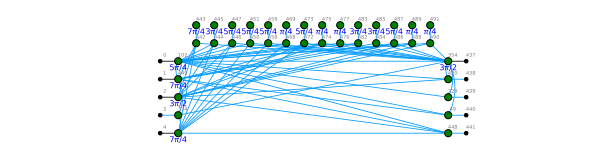

In [113]:
#random.seed(408389)
qubit_amount = 5
depth = 300
for i in range(1):
    circ = zx.cliffordT(qubit_amount, depth,p_t=0.2, p_hsh=0.0)
    g = circ.copy()
    zx.simplify.full_reduce(g, quiet=False)
    #zx.clifford_simp(g,quiet=True)
    #c = zx.extract.streaming_extract(g).to_basic_gates()
    #c2, blocks = circuit_phase_polynomial_blocks(c, optimize=True)
    #g.normalise()
    #gg = g
    #g = gg.copy()
    g.normalise()
    gadgets = []
    for v in g.vertices():
        if v not in g.inputs and v not in g.outputs and len(list(g.neighbours(v)))==1:
            gadgets.append(list(g.neighbours(v))[0])
    print(all(not g.connected(v,w) for v in gadgets for w in gadgets), len(gadgets))

zx.draw(g,labels=True)
#zx.draw(c2.to_graph(),labels=False,figsize=(25,3))

In [34]:
c3, blocks = circuit_phase_polynomial_blocks(c2, optimize=True, quiet=False)
zx.compare_tensors(circ.to_tensor(), c3.to_tensor())

x000 + x001 + x002
x001 + x002
x001
parity network cnots [CNOT(2,1), CNOT(2,0), CNOT(1,0)]
[ 1  1  0 ]
[ 0  1  1 ]
[ 0  0  1 ]
[ 1  1  1 ]
[ 0  1  1 ]
[ 0  1  0 ]
target matrix
[ 1  0  1 ]
[ 0  1  0 ]
[ 0  1  1 ]
Optimized cnot count: 6 -> 5 
Old cz count:  1 . New cz count:  1
x000 + x002
x001
x001 + x002
parity network cnots []
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
[ 1  0  1 ]
[ 0  1  0 ]
[ 0  1  1 ]
target matrix
[ 1  0  1 ]
[ 0  1  0 ]
[ 0  1  1 ]
Optimized cnot count: 2 -> 2 
Old cz count:  2 . New cz count:  2
x000
x001
x002
parity network cnots []
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
target matrix
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
Optimized cnot count: 0 -> 0 
x000
x001
x002
parity network cnots []
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
target matrix
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
Optimized cnot count: 0 -> 0 
x001
x002
x000
parity network cnots []
[ 1  0  0 ]
[ 0  1  0 ]
[ 0  0  1 ]
[ 0  1  0 ]
[ 0  0  1 ]

True

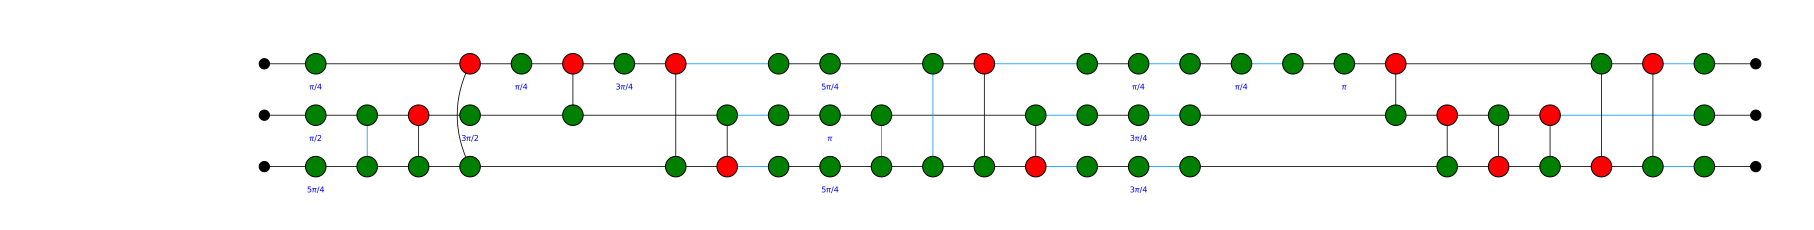

In [35]:
zx.draw(c3.to_graph(), figsize=(25,3))

In [52]:
from pyzx.circuit import SWAP
g = gg.copy()
c = zx.extract.streaming_extract(g)
swaps = []
for g in c.gates.copy():
    if isinstance(g, SWAP):
        swaps.append(g)
        c.gates.remove(g)
print(len(c.gates))
g = c.to_graph(compress_rows=True)
zx.simplify.id_simp(g,quiet=True)
zx.simplify.to_gh(g)
#zx.simplify.to_rg(g)
#zx.simplify.to_rg(g)
c = zx.Circuit.from_graph(g,split_phases=False)
print(len(c.gates))
zx.simplify.to_rg(g)
#zx.draw(g,figsize=(35,3),rows=(0,100))

1170
1328


In [53]:
from pyzx.phasepoly import circuit_phase_polynomial_blocks, optimize_block
c2, partition = circuit_phase_polynomial_blocks(c)
new_partition = []
for i in range(0,len(partition),2):
    new_partition.append(partition[i])
    if i+1<len(partition):
        block = optimize_block(partition[i+1],c.qubits)
        new_partition.append(block)

c3 = zx.Circuit(c.qubits)
for gs in new_partition: c3.gates.extend(gs)
print(len(c.gates), len(c2.gates),len(c3.gates))

1328 1162 1131


In [84]:
qubits = 12
depth = 800
prereduction = 0
reduction = 0
iterations = 100

for i in range(1,iterations+1):
    if i%20 == 0:
        print(i, end='.')
    seed = random.randint(0,100000)
    random.seed(seed)
    circ = zx.cliffordT(qubits, depth, p_t=0.2)
    g = circ.copy()
    zx.clifford_simp(g,quiet=True)
    g.normalise()
    c = zx.extract.streaming_extract(g)
    swaps = []
    for g in c.gates.copy():
        if isinstance(g, SWAP):
            swaps.append(g)
            c.gates.remove(g)
    g = c.to_graph(compress_rows=True)
    zx.simplify.id_simp(g,quiet=True)
    zx.simplify.to_gh(g)
    c2 = zx.Circuit.from_graph(g,split_phases=False)
    #c2, partition = circuit_phase_polynomial_blocks(c)
#     new_partition = []
#     for i in range(0,len(partition),2):
#         new_partition.append(partition[i])
#         if i+1<len(partition):
#             block = optimize_block(partition[i+1],c.qubits)
#             new_partition.append(block)

    c3, new_partition = circuit_phase_polynomial_blocks(c2, optimize=True)
    #for gs in new_partition: c3.gates.extend(gs)
    #if not zx.compare_tensors(c2.to_tensor(), c3.to_tensor()):
    #    raise Exception("Not equal")
    prereduction += depth - len(c.gates)
    reduction += len(c.gates) - len(c3.gates)

print("\nBefore reduction: ", prereduction/iterations)
print("Extra reduction: ", reduction/iterations)

20.40.60.80.100.
Before reduction:  64.14
Extra reduction:  35.66


In [79]:
len(c.gates), len(c3.gates)

(500, 586)

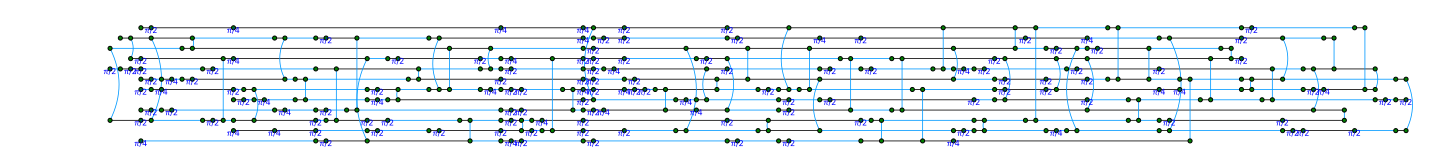

In [81]:
#c2, partition = c.get_phase_polynomial_blocks()
#print(len(c2.gates))
#print([len(partition[i]) for i in range(1,len(partition),2)])
g2 = c2.to_graph(compress_rows=True)

zx.draw(g2,figsize=(20,2),rows=(g2.depth()-250,g.depth()))

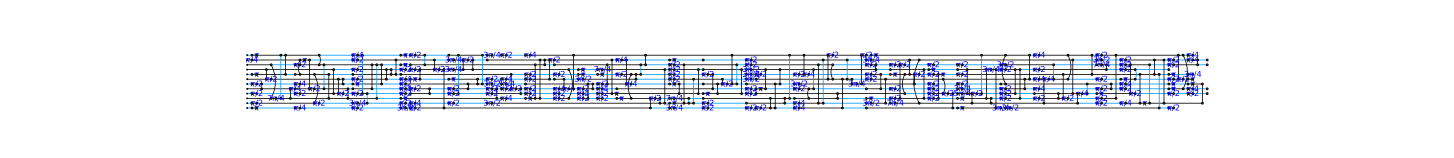

In [83]:
g3 = c3.to_graph(compress_rows=True)

zx.draw(g3,figsize=(20,2),rows=(0,200))

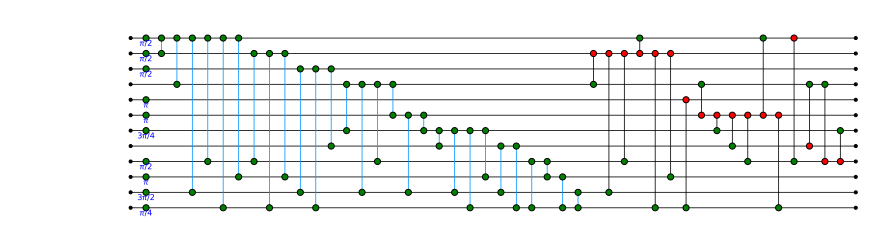

In [13]:
#for s in swaps: c2.add_gate(s)
#zx.compare_tensors(c2.to_tensor(), circ.to_tensor())
d1 = zx.Circuit(c.qubits)
d1.gates = partition[1]
        
zx.draw(d1.to_graph(), figsize=(12,3))

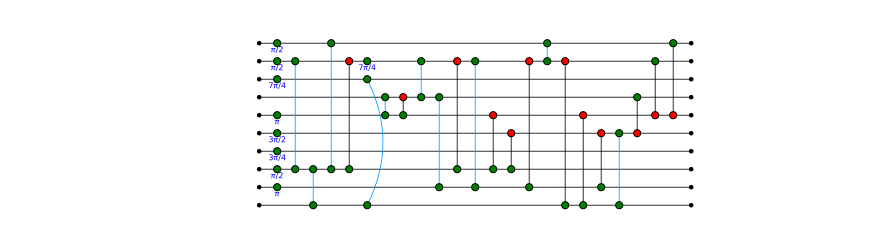

In [34]:
zx.draw(d2.to_graph(), figsize=(12,3))

In [19]:
from pyzx.circuit import HAD, CZ, ZPhase, CNOT
def phase_poly(block, qubit_count):
    q = qubit_count
    variables = ['x{:03d}'.format(i) for i in range(q)]
    phase_poly = BoolPolynomial()
    expression_polys = []
    for i in range(q):
        p = BoolPolynomial()
        p.add_term(variables[i],1)
        expression_polys.append(p)
    
    r = []

    for g in block:
        if isinstance(g, ZPhase):
            terms = expression_polys[g.target].terms
            if len(terms) == 1:
                term = list(terms.keys())[0]
            else:
                term = "({})".format("+".join(t[0] for t in terms.keys()))
            phase_poly.add_term(term, g.phase)
        elif isinstance(g, CZ):
            tgt, ctrl = g.target, g.control
            phase_poly.add_polynomial(expression_polys[tgt]*expression_polys[ctrl])
            r.append(phase_poly)
        elif isinstance(g, CNOT):
            tgt, ctrl = g.target, g.control
            expression_polys[tgt].add_polynomial(expression_polys[ctrl])
    
    print(phase_poly)
    
    simple_phases = []
    czs = []
    parities = []
    for t, phase in phase_poly.terms.items():
        if len(t) == 2:
            czs.append((variables.index(t[0]),variables.index(t[1])))
            continue
        t = t[0]
        if '+' in t:
            l = []
            for v in variables:
                l.append(int(v in t[1:-1].split('+')))
            parities.append((l,phase))
        else: simple_phases.append((variables.index(t), phase))
    
    czs = set(czs)
    print(simple_phases)
    print(czs)
    print(parities)
    return czs

r1 = phase_poly(d1.gates, d1.qubits)
#r2 = phase_poly(d2.gates, d2.qubits)
#print(r1)
#print(r2)

1/2x000 + x000x001 + x000x003 + x000x008 + x000x009 + x000x010 + x000x011 + 1/2x001 + x001x008 + x001x009 + x001x011 + 1/2x002 + x002x007 + x002x010 + x002x011 + x003x005 + x003x006 + x003x008 + x003x010 + x004 + x005 + x005x006 + x005x010 + 3/4x006 + x006x007 + x006x009 + x006x010 + x006x011 + x007x010 + x007x011 + 1/2x008 + x008x009 + x008x011 + x009 + x009x011 + 3/2x010 + x010x011 + 1/4x011
[(10, Fraction(3, 2)), (2, Fraction(1, 2)), (0, Fraction(1, 2)), (4, Fraction(1, 1)), (11, Fraction(1, 4)), (1, Fraction(1, 2)), (8, Fraction(1, 2)), (6, Fraction(3, 4)), (9, Fraction(1, 1)), (5, Fraction(1, 1))]
{(6, 9), (10, 11), (5, 6), (8, 9), (0, 10), (7, 11), (0, 3), (1, 11), (6, 7), (3, 10), (6, 10), (0, 11), (9, 11), (7, 10), (3, 6), (6, 11), (8, 11), (2, 10), (1, 9), (0, 8), (3, 5), (2, 7), (0, 1), (5, 10), (2, 11), (3, 8), (1, 8), (0, 9)}
[]


In [28]:
from pyzx.circuit import ZPhase, CNOT, CZ, HAD

def optimize_block(block, qubit_count):
    q = qubit_count
    #First we construct the phase polynomial
    variables = ['x{!s}'.format(i) for i in range(c.qubits)]
    phase_poly = BoolPolynomial()
    expression_polys = []
    for i in range(c.qubits):
        p = BoolPolynomial()
        p.add_term(variables[i],1)
        expression_polys.append(p)

    for g in block:
        if isinstance(g, ZPhase):
            terms = expression_polys[g.target].terms
            if len(terms) == 1:
                term = list(terms.keys())[0]
            else:
                term = "({})".format("+".join(t[0] for t in terms.keys()))
            phase_poly.add_term(term, g.phase)
        elif isinstance(g, CZ):
            tgt, ctrl = g.target, g.control
            phase_poly.add_polynomial(expression_polys[tgt]*expression_polys[ctrl])
        elif isinstance(g, CNOT):
            tgt, ctrl = g.target, g.control
            expression_polys[tgt].add_polynomial(expression_polys[ctrl])

#     print(phase_poly)
#     for p in expression_polys:
#         print(p)
    
    # Then we extract the parities for the CZs and phases
    simple_phases = []
    czs = []
    parities = []
    for t, phase in phase_poly.terms.items():
        if len(t) == 2:
            czs.append((variables.index(t[0]),variables.index(t[1])))
            continue
        t = t[0]
        if '+' in t:
            l = []
            for v in variables:
                l.append(int(v in t[1:-1].split('+')))
            parities.append((l,phase))
        else: simple_phases.append((variables.index(t), phase))
    
    czs = set(czs)
    
    #print(simple_phases)
    #print(czs)
    #print(parities)
    
    # We try to make our cnots more efficient
    q = c.qubits
    cnots = parity_network(q, [par for par,phase in parities])
    m = zx.linalg.Mat2.id(q)
    for cnot in cnots:
        m.row_add(cnot.control, cnot.target)

    data = []
    for p in expression_polys:
        l = [int((v,) in p.terms) for v in variables]
        data.append(l)
    target_matrix = zx.linalg.Mat2(data) * m.inverse()

    class CNOTMaker:
        def __init__(self):
            self.cnots = []
        def row_add(self, r1, r2):
            self.cnots.append(CNOT(r1,r2))

    best = 100000
    best_cn = None
    for size in range(2,q):
        cn = CNOTMaker()
        target_matrix.copy().gauss(full_reduce=True,x=cn, blocksize=size)
        if len(cn.cnots) < best:
            best = len(cn.cnots)
            best_cn = cn

    cnots = cnots + list(reversed(best_cn.cnots))
    old_cnots = [g for g in block if isinstance(g,CNOT)]

    if len(cnots) > len(old_cnots):
        print("New set of CNOTs is worse, using old set.", len(cnots), len(old_cnots))
        cnots = old_cnots

    m = zx.linalg.Mat2.id(q)
    cz_sites = {(0,r1,r2):[(r1,r2)] for r1 in range(q) for r2 in range(q) if r1<r2}
    cz_parities = list(cz_sites.values())
    phase_locations = []
    for i, cnot in enumerate(cnots):
        m.row_add(cnot.control, cnot.target)
        for par, phase in parities:
            if par in m.data:
                phase_locations.append((i+1,m.data.index(par),phase))
                parities.remove((par,phase))
                break
        for r1 in range(q):
            for r2 in range(r1+1, q):
                if any(m.data[r1][j] and m.data[r2][j] for j in range(q)):
                    continue
                l = set([(j1,j2) for j1 in range(q) if m.data[r1][j1] for j2 in range(q) if m.data[r2][j2]])
                if l not in cz_parities:
                    cz_sites[(i+1,r1,r2)] = l
                    cz_parities.append(l)
                    
    old_cz_count = sum(1 for g in block if isinstance(g,CZ))
    new_czs = []
    while czs:
        best = len(czs)
        choice = None
        for loc, l in cz_sites.items():
            score = len(czs.symmetric_difference(l))
            if score < best:
                best = score
                choice = loc
        if not choice:
            print(":(")
            print(czs)
        new_czs.append(choice)
        czs.symmetric_difference_update(cz_sites[choice])
    print("Old cz count: ", old_cz_count, ". New cz count: ", len(new_czs))
    
    new_block = []
    for loc, phase in simple_phases:
        new_block.append(ZPhase(loc,phase))
    for i, cnot in enumerate(cnots):
        for j, loc, phase in phase_locations:
            if j!=i: continue
            new_block.append(ZPhase(loc,phase))
        for j, r1, r2 in new_czs:
            if j!=i: continue
            new_block.append(CZ(r1,r2))
        new_block.append(cnot)
    
    return new_block

Old cz count:  1 . New cz count:  1


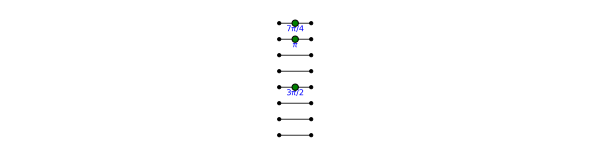

In [29]:
q = c.qubits

block = partition[7]

new_block = optimize_block(block, q)

c3 = zx.Circuit(q)
for g in new_block: c3.add_gate(g)

zx.draw(c3.to_graph(compress_rows=True))

In [231]:
c4 = zx.Circuit(q)
for g in block: c4.add_gate(g)

zx.compare_tensors(c3.to_tensor(),c4.to_tensor())

True

In [20]:
l = list(range(1000000))
isinstance(reversed(l),list)

False

In [11]:
m = zx.linalg.Mat2.id(4)
class CNOTMaker:
    def __init__(self):
        self.cnots = []
    def row_add(self, r1, r2):
        self.cnots.append(CNOT(r1,r2))

cn = CNOTMaker()
m.gauss(full_reduce=True,x=cn,blocksize=2)
cn.cnots

[]

In [15]:
class Polynomial:
    def __init__(self,poly=None):
        if poly:
            self.terms = poly.terms.copy()
        else: self.terms = {}
    
    def copy(self):
        return type(self)(self)
    
    def __str__(self):
        l = []
        for t in sorted(self.terms.keys()):
            val = self.terms[t]
            l.append("{!s}{}".format(val if val!=1 else "", "".join(str(v) for v in sorted(list(t)))))
        return " + ".join(l)
    
    def __repr__(self):
        return str(self)
    
    def add_term(self, term, value):
        if isinstance(term, str):
            term = (term, )
        term = tuple(sorted(term))
        if term in self.terms:
            if self.terms[term] == -value:
                del self.terms[term]
            else: self.terms[term] += value
        else: self.terms[term] = value
    
    def add_polynomial(self, poly):
        for term in poly.terms:
            self.add_term(term, poly.terms[term])
    
    def __add__(self, other):
        p = self.copy()
        p.add_polynomial(other)
        return p
    
    def mult_by_term(self, term, value):
        if value == 0:
            return type(self)() # Zero polynomial
        p = type(self)()
        for t in self.terms:
            s = set()
            s.update(t)
            s.update(term)
            p.add_term(tuple(sorted(list(s))), self.terms[t]*value)
        return p
    
    def mult_by_polynomial(self, poly):
        p = type(self)()
        for term, value in poly.terms.items():
            p.add_polynomial(self.mult_by_term(term,value))
        self.terms = p.terms
    
    def __mul__(self, other):
        p = self.copy()
        p.mult_by_polynomial(other)
        return p
    
    def __rmul__(self,other):
        p = self.copy()
        for t in p.terms:
            p.terms[t] *= other
        return p

class BoolPolynomial(Polynomial):
        
    def add_term(self, term, value):
        val = value%2
        if not val: return
        if isinstance(term, str):
            term = (term, )
        term = tuple(sorted(term))
        if term in self.terms:
            self.terms[term] = (self.terms[term] + val)%2
            if not self.terms[term]:
                del self.terms[term]
        else: self.terms[term] = val
    
p = BoolPolynomial()
p.add_term(('a',),2)
p.add_term('b',1)
#p.mult_by_polynomial(p)
print(p*p)

b


In [65]:
l = [1,2,3]
l.pop()

3

In [9]:
def parity_network(n, S):
    # See page 14 of https://arxiv.org/pdf/1712.01859.pdf
    c = [] # List of cnots
    Q = [] # stack
    Q.append((S,list(range(n)),-1))
    while Q:
        S, I, i = Q.pop()
        if not S or not I: continue
        if i != -1:
            while True:
                for j in range(n):
                    if j==i: continue
                    if all(y[j] for y in S):
                        c.append(CNOT(j,i))
                        for (Sp,Ip,ip) in (Q+[(S,I,i)]):
                            for y in Sp:
                                y[j] = (y[i]+y[j])%2
                        break
                else:
                    break
        j = max(I, key=lambda j: max([len([y for y in S if y[j]==0]),len([y for y in S if y[j]==1])]))
        S0 = [y.copy() for y in S if y[j]==0]
        S1 = [y.copy() for y in S if y[j]==1]
        Iprime = [jp for jp in I if jp!=j]
        if i == -1:
            Q.append((S1,Iprime,j))
        else:
            Q.append((S1,[jp for jp in I if jp!=i],i))
        Q.append((S0,Iprime, i))
    return c

In [10]:
m = [[0,1,1,0],
     [1,0,0,0],
     [1,0,0,1],
     [1,1,1,0],
     [1,1,0,1],
     [1,1,0,0]]
parity_network(4,m)


[CNOT(2,1), CNOT(3,0), CNOT(1,0), CNOT(3,0), CNOT(2,0), CNOT(3,0)]

In [56]:
block = partition[3]
gates = {i:list() for i in range(c.qubits)}
for i,g in enumerate(block):
    g.index = i
    if isinstance(g,ZPhase):
        gates[g.target].append(g)
    elif isinstance(g, (CZ,CNOT)):
        gates[g.control].append(g)
        gates[g.target].append(g)

qoptions = {}
qmaxindex = {}
for q in range(c.qubits):
    index = 0
    options = []
    max_index = 
    encountered_cnot = False
    for g in gates[q]:
        if isinstance(g,ZPhase):
            if encountered_cnot: 
                index = g.index
                encountered_cnot=False
        if isinstance(g,CZ):
            options.append((g,list()))
        elif isinstance(g, CNOT):
            if g.target != q: 
                index = g.index
                encountered_cnot = False
                continue
            for cz, l in options:
                if cz.index > index:
                    l.append(g)
            encountered_cnot = True
    qoptions[q] = options

qoptions

# for q in range(c.qubits):
#     for cz, cnots in qoptions[q]:
#         q2 = cz.control if cz.target==q else cz.target
#         found_match=False
#         for cnot in cnots:
#             q3 = cnot.control
#             for cz2, l in qoptions[q3]:
#                 if g.index > cnot.index or (l and max(g.index for g in l) < cnot.index): continue
#                 if q2 in (g.control, g.target):
#                     print("Match!", cz, cz2, cnot)

#         for g in gates[q2]:
#             if isinstance(g, CZ) and g.target!=q and g.control!=q:
#                 q3 = g.control if g.target==q else g.target
#                 for cnot in cnots:
#                     if cnot.control == q3 and cnot.control != q2:
#                         print("Match!", cz, g, cnot)
#                         true_index = block.index(cnot)
#                         block.insert(true_index+1,cz)
#                         block.remove(g)
#                         block.remove(cz)
#                         found_match=True
#                         break
#                 if found_match: break
                        

SyntaxError: invalid syntax (<ipython-input-56-226a38a4bffe>, line 16)